In [5]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap  # Import the textwrap module for title wrapping
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [6]:
#from here begins the real analysis

In [7]:
def centuryFromYear(year):
    return (year) // 100 + 1

df = pd.read_excel("Decoder+TOC.xlsx")
df.set_index("Wright Numeration", inplace = True)
df.dropna(subset=["To Date","From Date"],inplace=True)
df['date'] = df['To Date'].apply(lambda x: int(centuryFromYear(x))) # it is important to check this also with "from date"
df

,Shelfmark,Wright Section,Wright Sub-Section,Wright Dating,From Date,Wright's Dating Calc.,To Date,Dated,MC,Liturgical,Scientific,Biblical,Individual Theology,Other,Volume,pages,length,firstpage,lastpage,date
Wright Numeration,,,,,,,,,,,,,,,,,,,,
LI,"Add.12,133,foll.109-169",Biblical Manuscripts,Old Testament,8c,701.0,701-799,799.0,False,0.0,0.0,0.0,1.0,0.0,0.0,1.0,31-32,1.0,31.0,32.0,8
IX,"Add.12,133,foll.1-108",Biblical Manuscripts,Old Testament,8c(early),701.0,701-799,799.0,False,0.0,0.0,0.0,1.0,0.0,0.0,1.0,7-8,1.0,7.0,8.0,8
XLIX,"Add.12,134",Biblical Manuscripts,Old Testament,697,697.0,697,697.0,True,0.0,0.0,0.0,1.0,0.0,0.0,1.0,29-31,2.0,29.0,31.0,7
XL,"Add.12,135,foll.1-43",Biblical Manuscripts,Old Testament,726,726.0,726,726.0,True,0.0,0.0,0.0,1.0,0.0,0.0,1.0,24-26,2.0,24.0,26.0,8
DCXIII,"Add.12,135,foll.44-207",Theology,Individual Authors,611,611.0,611,611.0,True,0.0,0.0,0.0,0.0,0.0,1.0,2.0,486-487,1.0,486.0,487.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I,Egerton704,Biblical Manuscripts,Old Testament,17c,1601.0,1601-1699,1699.0,False,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1-3,2.0,1.0,3.0,17
MVII,Egerton709,Scientific Literature,Chemistry,16c,1501.0,1501-1599,1599.0,False,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1190-1191,1.0,1190.0,1191.0,16
CCLXXXIII,Harl.5512,Service Books,Missals,1549,1549.0,1549,1549.0,True,0.0,1.0,0.0,0.0,0.0,0.0,1.0,214-216,2.0,214.0,216.0,16


In [8]:
trial_master = pd.read_excel('trial master updated.xlsx')
trial_master.head()

,filename,shelfmark,date,roman,ID,overtitle,to folio,title,rubric,finalRubric,...,desc,from folio,from folio ab,to folio ab,length,from folio sum,to folio sum,Wright Section,Wright Sub-Section,Wright simple-shelfmark
0,1.xml,"Add. 12,133, foll. 1–108",8,IX,p1addition4,0.0,2,NaN,NaN,NaN,...,NaN,2,0.0,0.0,0.0,2.0,2.0,Biblical Manuscripts,Old Testament,"Add.12,133,foll.1-108"
1,1.xml,"Add. 12,133, foll. 1–108",8,IX,p1addition5,0.0,3,NaN,NaN,NaN,...,NaN,2,0.0,0.5,1.5,2.0,3.5,Biblical Manuscripts,Old Testament,"Add.12,133,foll.1-108"
2,1.xml,"Add. 12,133, foll. 1–108",8,IX,p1a1,0.0,107,"The book of Exodus, according to the Peshitta ...",ܡܦܩܢܐ̇ ܣܦܪܐ ܕܬܪ̈ܝܼܢ ܕܐܘܪܝܬܐ,ܫܠܡ ܡܦܩܢܐ̇ ܣ̣ܦܪܐ ܕܬܪ̈ܝܼܢ ܕܐܘܪܝܬܐ;,...,NaN,3,0.5,0.5,104.0,3.5,107.5,Biblical Manuscripts,Old Testament,"Add.12,133,foll.1-108"
3,1.xml,"Add. 12,133, foll. 1–108",8,IX,p1addition1,0.0,108,NaN,NaN,NaN,...,NaN,107,0.5,0.0,0.5,107.5,108.0,Biblical Manuscripts,Old Testament,"Add.12,133,foll.1-108"
4,1.xml,"Add. 12,133, foll. 1–108",8,IX,p1addition2,1.0,108,NaN,NaN,NaN,...,NaN,108,0.0,0.0,0.0,108.0,108.0,Biblical Manuscripts,Old Testament,"Add.12,133,foll.1-108"


In [24]:
#return to section classification
#fix subsections
trial_master['Wright Sub-Section'] = None
trial_master['Wright Section'] = None
trial_master['Wright Pages'] = None
for i in range(len(trial_master)):
    trial_master['Wright Sub-Section'][i] = df['Wright Sub-Section'].loc[trial_master['roman'][i]]
    trial_master['Wright Section'][i] = df['Wright Section'].loc[trial_master['roman'][i]]
    trial_master['Wright Pages'][i] = df['length'].loc[trial_master['roman'][i]]
   

In [10]:
trial_master['Wright Sub-Section'].unique()

array(['Old Testament', 'Punctuation (Masora)', 'New testament',
       'Missals', 'Sacerdotals', 'Choral Books', 'Hymns',
       'Individual Authors', 'Psalters', 'Funeral Services',
       'Collected Authors', 'Collected Lives of Saints', 'Lectionaries',
       'Single lives', 'Anonymous Works', 'Ethics',
       'Grammar and Lexicography', 'History', 'Chemistry', 'Apocrypha',
       'Catenae Patrum and Demonstrations against Heresies', 'Prayers',
       'Councils of the Church and Ecclesiastical Canons',
       'Logic and Rhetoric', 'Medicine', 'Agriculture', 'Natural History'],
      dtype=object)

In [19]:
# filter out dates and genres
#genres = ['Theology (Collected)']#'Theology (Individual)'
filter_master = trial_master.copy()#[trial_master['date']<11]
#filter_master = filter_master[filter_master['Wright Section'].isin(genres)]# in genres]
len(filter_master)

19916

In [20]:
#fix long subsections
for i in range(len(filter_master)):
    if filter_master['Wright Sub-Section'][i]== 'Catenae Patrum and Demonstrations against Heresies':
        filter_master['Wright Sub-Section'][i] = 'Demonstrations'
    if filter_master['Wright Sub-Section'][i]== 'Councils of the Church and Ecclesiastical Canons':
        filter_master['Wright Sub-Section'][i] = 'Canons'

In [21]:
filter_master['Wright simple-shelfmark'].describe()

count          19916
unique           998
top       Add.12,155
freq            1191
Name: Wright simple-shelfmark, dtype: object

In [14]:
# now lets get descriptives, to get more of a sense of what is going on. since the distribution is non-normal, we must
# use the quartile measurments to get a more accurate representation of the excerpting behavior
#overall and then according to genre and diachronically. 

In [25]:
# the basic statistics and distributions of excerpting per manuscript without genre and diachronic frameworks.
sum_count = pd.DataFrame(filter_master.groupby(['Wright simple-shelfmark','Wright Pages']).count()['length'])#,'date']
sum_count = sum_count.rename(columns={'length':'EPM'}).sort_values(by='EPM')
sum_count

,,EPM
Wright simple-shelfmark,Wright Pages,
"Add.17,217,fol.53",1.0,1
"Add.17,213,fol.3",1.0,1
"Add.14,635,foll.19,20",1.0,1
"Add.17,218,fol.43",1.0,1
"Add.17,218,fol.47",1.0,1
...,...,...
"Add.14,533",9.0,277
"Add.12,154",13.0,303
"Add.17,134",9.0,486


In [14]:
sum_count['EPM'].describe()

count     998.000000
mean       19.955912
std        53.994800
min         1.000000
25%         2.000000
50%         7.000000
75%        20.750000
max      1191.000000
Name: EPM, dtype: float64

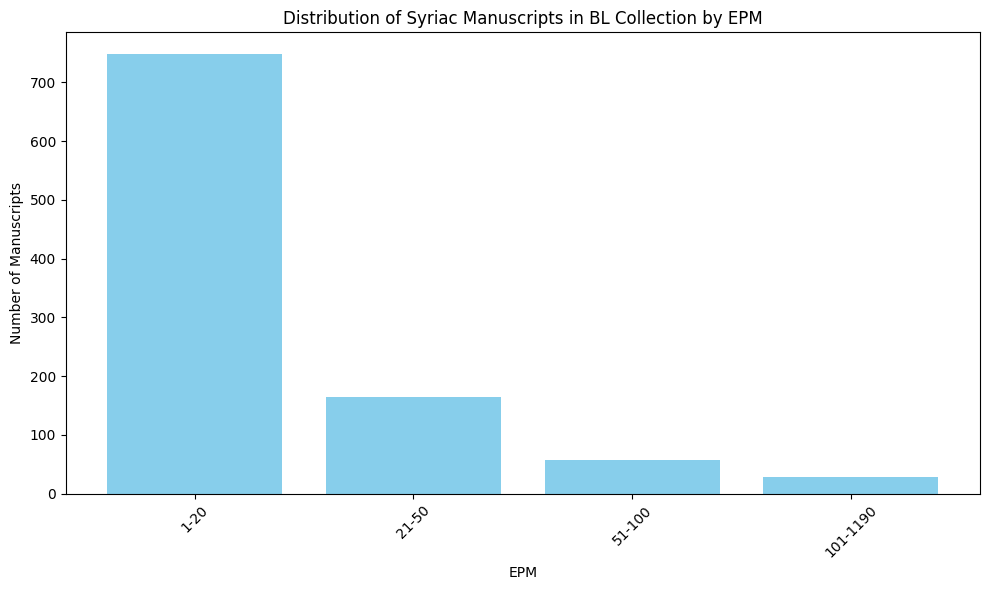

In [15]:
# Data
categories = ["1-20", "21-50", "51-100", "101-1190"]
manuscript_counts = [748, 164, 57, 29]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, manuscript_counts, color='skyblue')

# Add labels and title
plt.xlabel('EPM')
plt.ylabel('Number of Manuscripts')
plt.title('Distribution of Syriac Manuscripts in BL Collection by EPM')

# Display the chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:

sum_count = pd.DataFrame(filter_master.groupby(['Wright Section','Wright Sub-Section','Wright simple-shelfmark']).count()['length'])#,'date']
sum_count.reset_index(inplace=True)
sum_count.set_index(['Wright Section','Wright Sub-Section'],inplace=True)
sum_count.sort_index(inplace=True)
sum_count

Wright simple-shelfmark  length
Wright Section       Wright Sub-Section                                
Biblical Manuscripts Apocrypha             Add.12,142,foll.1-73       5
                     Apocrypha                       Add.14,446       5
                     Apocrypha                       Add.14,447       6
                     Apocrypha              Add.14,484,foll.1-8       1
                     Apocrypha            Add.14,484,foll.12-47       3
...                                                         ...     ...
Theology             Individual Authors              Add.18,815      18
                     Individual Authors              Add.18,818       3
                     Individual Authors              Add.21,580      51
                     Individual Authors              Add.22,370      13
                     Individual Authors              Add.23,596      36

[998 rows x 2 columns]

In [17]:
#### get and plot ranges of sections

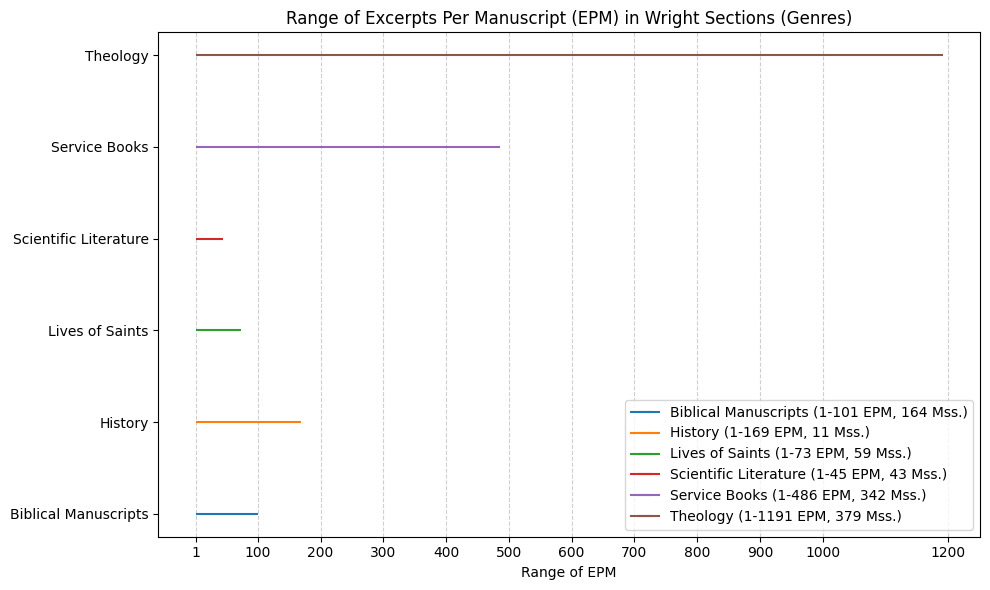

In [18]:
# Create df based on sections
df = sum_count.groupby(['Wright Section']).describe().drop(columns=[('length','std'),('length','mean'),('length','25%'),('length','75%')])

categories = df.index.get_level_values('Wright Section').unique().to_list()  # Get unique index values at level 'Wright Section' for sections

epm_ranges = [(df[('length','min')][i], df[('length','max')][i]) for i in range(0, len(df[('length','max')]))]

# Calculate the midpoints of the range
midpoints = [(range_[0] + range_[1]) / 2 for range_ in epm_ranges]

# Extract the range of the x-axis (EPM)
x_ranges = [range_[1] - range_[0] for range_ in epm_ranges]

# Create the range chart with a logarithmic x-axis scale
fig, ax = plt.subplots(sharex=True, figsize=(10, 6))

# Plot horizontal lines with error bars to represent the range
for i, category in enumerate(categories):
    ax.errorbar(midpoints[i], i, xerr=x_ranges[i] / 2, label=f'{category} ({int(df["length", "min"][i])}-{int(df["length", "max"][i])} EPM, {int(df["length", "count"][i])} Mss.)')

# Set y-axis labels
ax.set_yticks(range(len(categories)))
ax.set_yticklabels(categories)

# Define and set custom x-tick values
custom_xticks = [1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200]
ax.set_xticks(custom_xticks)  # Set custom x-ticks

# Add labels and title
plt.xlabel('Range of EPM')
plt.title('Range of Excerpts Per Manuscript (EPM) in Wright Sections (Genres)')

# Display the chart
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(loc='lower right')  # Add legend
plt.show()
plt.close()


In [19]:
df

length                   
                       count  min   50%     max
Wright Section                                 
Biblical Manuscripts   164.0  1.0   6.0   101.0
History                 11.0  1.0   7.0   169.0
Lives of Saints         59.0  1.0   5.0    73.0
Scientific Literature   43.0  1.0   2.0    45.0
Service Books          342.0  1.0   8.0   486.0
Theology               379.0  1.0  10.0  1191.0

In [20]:
###### get and plot ranges of subsections

In [21]:
#create df based on sections and subsections
df = sum_count.groupby(['Wright Section','Wright Sub-Section']).describe().drop(columns=[('length','std'),('length','mean'),('length','25%'),('length','75%')])
df

length                     
                                                 count   min    50%     max
Wright Section        Wright Sub-Section                                   
Biblical Manuscripts  Apocrypha                    6.0   1.0    4.0     6.0
                      New testament               79.0   1.0    8.0    37.0
                      Old Testament               73.0   1.0    4.0    42.0
                      Punctuation (Masora)         6.0  14.0   24.0   101.0
History               History                     11.0   1.0    7.0   169.0
Lives of Saints       Collected Lives of Saints   39.0   1.0    9.0    73.0
                      Single lives                20.0   1.0    1.0     6.0
Scientific Literature Agriculture                  1.0  14.0   14.0    14.0
                      Chemistry                    1.0  28.0   28.0    28.0
                      Ethics                       2.0  14.0   26.0    38.0
                      Grammar and Lexicography     6.0   2.0    3.0    45.0
                      Logic and Rhetoric           8.0   1.0    5.0    38.0
                      Medicine                     2.0   4.0    9.0    14.0
                      Natural History             23.0   1.0    2.0     3.0
Service Books         Choral Books               113.0   1.0   10.0   127.0
                      Funeral Services            14.0   1.0   11.0    33.0
                      Hymns                       68.0   1.0    7.5   486.0
                      Lectionaries                35.0   1.0    7.0   170.0
                      Missals                     24.0   1.0    2.0    55.0
                      Prayers                     18.0   1.0    3.0   130.0
                      Psalters                    51.0   1.0    4.0    56.0
                      Sacerdotals                 19.0   1.0   12.0   125.0
Theology              Anonymous Works             40.0   1.0    1.0    25.0
                      Canons                       6.0   2.0   24.0    38.0
                      Collected Authors          124.0   1.0   24.0   236.0
                      Demonstrations              13.0  28.0  168.0  1191.0
                      Individual Authors         196.0   1.0    6.0   177.0

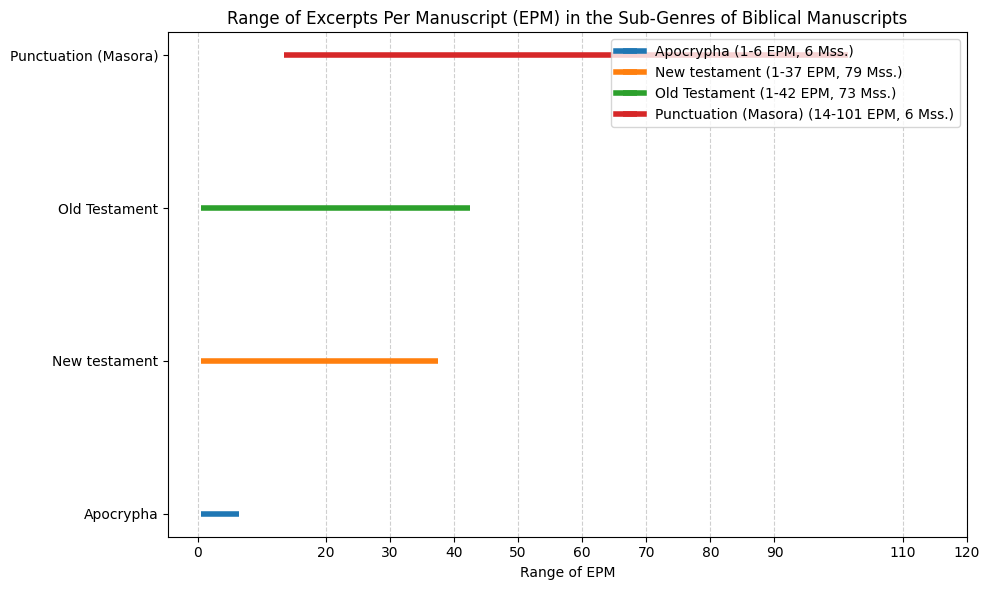

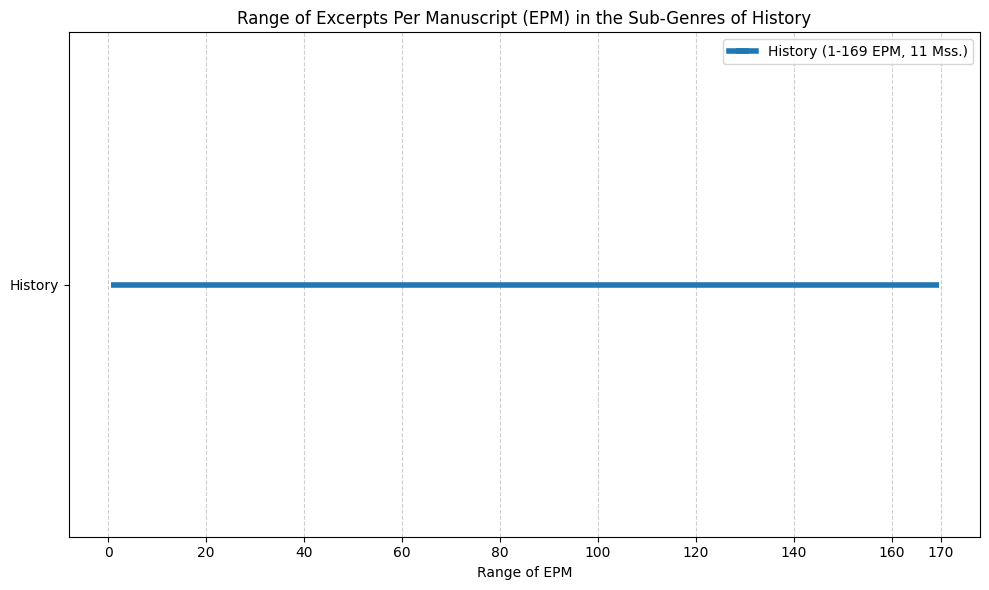

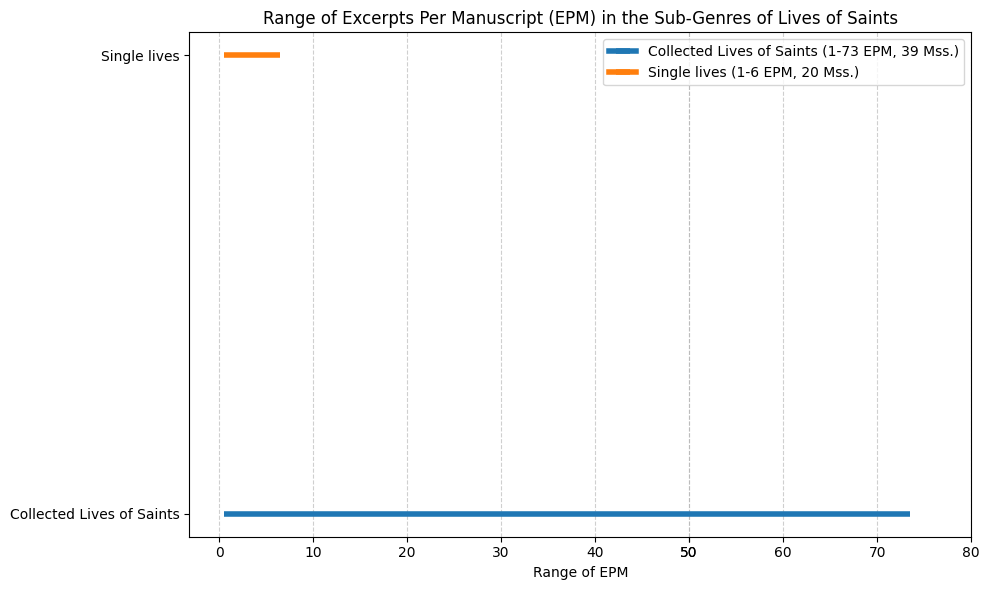

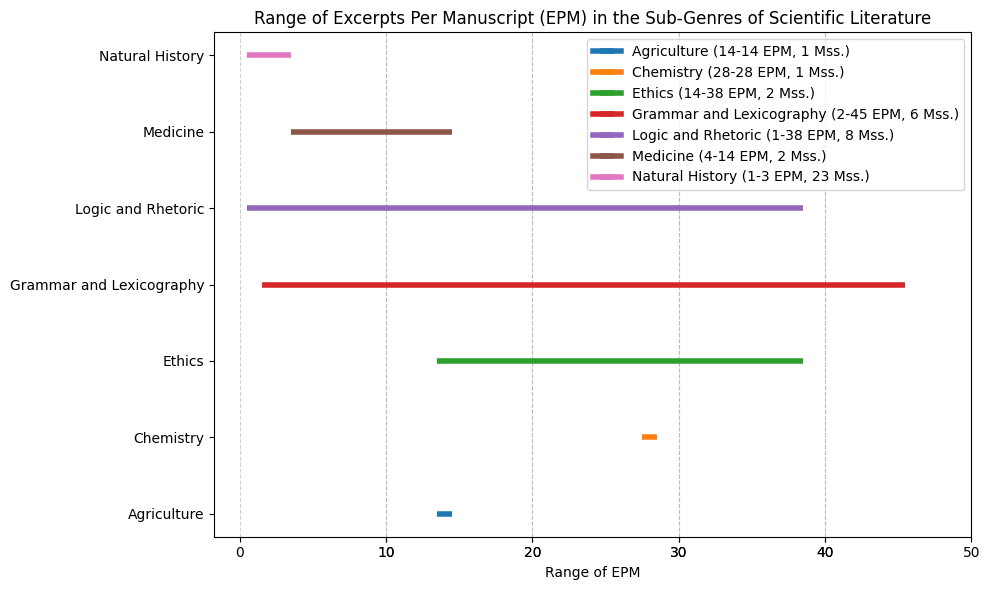

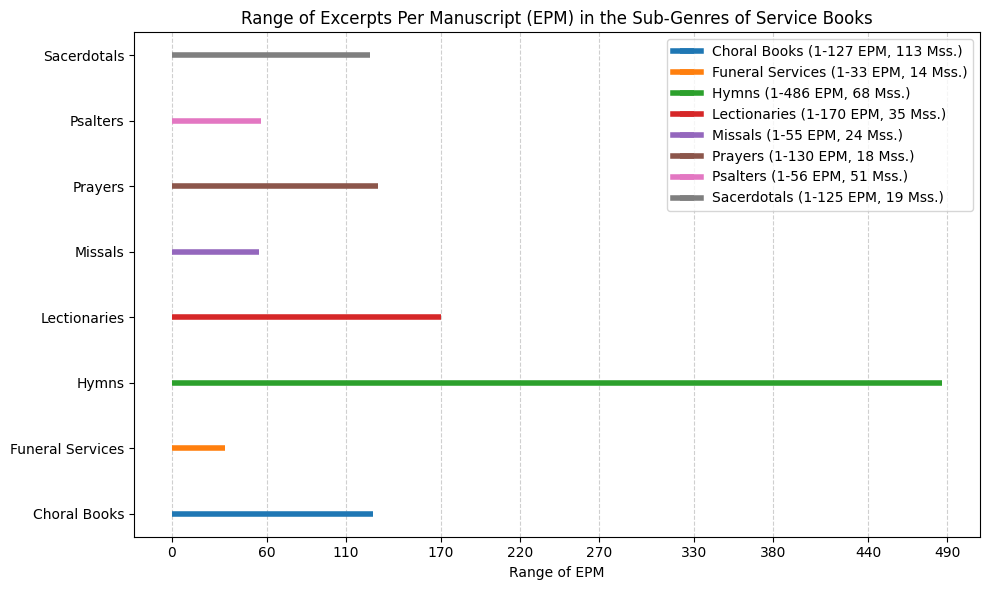

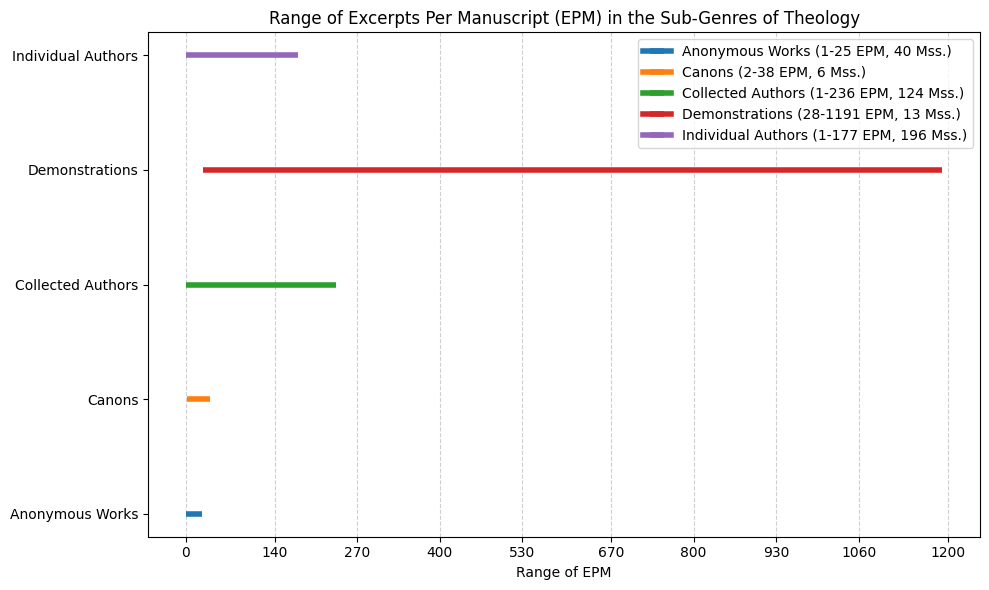

In [31]:
#plot the subsections

for section in df.index.get_level_values(0).unique().to_list(): #get unique index values at level 0 for sections
    temp_categories = df.loc[section, ].index.to_list() #get level 1 values for subsection names
    temp_df = df.loc[section, ]
    epm_ranges = [(temp_df['length','min'][i], temp_df['length','max'][i]) for i in range(0, len(temp_df['length','max']))]

    # Calculate the midpoints of the range
    midpoints = [(range_[0] + range_[1]) / 2 for range_ in epm_ranges]

    # Extract the range of the x-axis (EPM)
    x_ranges = [range_[1] - range_[0]+1 for range_ in epm_ranges]

    # Create the range chart with a logarithmic x-axis scale
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot horizontal lines with error bars to represent the range
    for i, category in enumerate(temp_categories):
        ax.errorbar(midpoints[i], i, xerr=x_ranges[i] / 2, 
                    label=f'{category} ({int(temp_df["length", "min"][i])}-{int(temp_df["length", "max"][i])} EPM, {int(temp_df["length", "count"][i])} Mss.)',
                    linewidth=4) 

    # Set a logarithmic scale on the x-axis
    # ax.set_xscale('log')

    # Set y-axis labels
    ax.set_yticks(range(len(temp_categories)))
    ax.set_yticklabels(temp_categories)

    # Define and set custom x-tick values
    max_x = temp_df['length','max'].max()

    num_xticks = 10

    # Calculate the step size for equal intervals
    step = max_x / (num_xticks - 1)

    # Create custom x-ticks with equal intervals, rounded up to the nearest tens place digit
    custom_xticks = [int(np.ceil(i / 10) * 10) for i in np.arange(0, max_x + step, step)]
   
    ax.set_xticks(custom_xticks)  # Set custom x-ticks

    # Add labels and title
    plt.xlabel('Range of EPM')
    plt.title(f'Range of Excerpts Per Manuscript (EPM) in the Sub-Genres of {section}')

    # Display the chart
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()
    plt.close()

In [61]:
plt.close()

In [57]:
temp_df['length','count']

Wright Sub-Section
Apocrypha                6.0
New testament           79.0
Old Testament           73.0
Punctuation (Masora)     6.0
Name: (length, count), dtype: float64

In [258]:
# #chart individual section
# categories = df.loc['Theology', ].index.to_list()

# df = df.loc['Theology', ]

# epm_ranges = [(df['length','min'][i], df['length','max'][i]) for i in range(0, len(df['length','max']))]

# # Calculate the midpoints of the range
# midpoints = [(range_[0] + range_[1]) / 2 for range_ in epm_ranges]

# # Extract the range of the x-axis (EPM)
# x_ranges = [range_[1] - range_[0] for range_ in epm_ranges]

# # Create the range chart with a logarithmic x-axis scale
# fig, ax = plt.subplots(figsize=(10, 6))

# # Plot horizontal lines with error bars to represent the range
# for i, category in enumerate(categories):
#     ax.errorbar(midpoints[i], i, xerr=x_ranges[i] / 2, label=category)

# # Set a logarithmic scale on the x-axis
# # ax.set_xscale('log')

# # Set y-axis labels
# ax.set_yticks(range(len(categories)))
# ax.set_yticklabels(categories)

# # Define and set custom x-tick values
# custom_xticks = [1,100, 200, 300,400,500,600,700,800,900,1000,1200]
# ax.set_xticks(custom_xticks)  # Set custom x-ticks


# # Add labels and title
# plt.xlabel('Range of EPM')
# plt.title('Range of Excerpts Per Manuscript (EPM) in Wright Sections (Genres)')

# # Display the chart
# plt.grid(axis='x', linestyle='--', alpha=0.6)
# plt.tight_layout()
# #plt.legend(loc='upper right')
# plt.show()

    

In [41]:
sum_count = pd.DataFrame(filter_master.groupby(['Wright Section','Wright Sub-Section','Wright simple-shelfmark','date']).count()['length'])
sum_count['EPM grp'] = pd.cut(sum_count['length'].sort_values(),[0,20,50,100,2000], labels=['1-20','21-50','51-100','101-2,000'])
sum_count.reset_index(inplace=True)
sum_count.rename(columns = {'length':'EPM','date':'Date','Wright simple-shelfmark':'Shelfmark'}, inplace=True)

sum_count[['Shelfmark','Wright Section','Wright Sub-Section','EPM','Date','EPM grp']].to_excel('EPM master.xlsx', index=False)
sum_count

,Wright Section,Wright Sub-Section,Shelfmark,Date,EPM,EPM grp
0,Biblical Manuscripts,Apocrypha,"Add.12,142,foll.1-73",7,5,1-20
1,Biblical Manuscripts,Apocrypha,"Add.14,446",7,5,1-20
2,Biblical Manuscripts,Apocrypha,"Add.14,447",10,6,1-20
3,Biblical Manuscripts,Apocrypha,"Add.14,484,foll.1-8",6,1,1-20
4,Biblical Manuscripts,Apocrypha,"Add.14,484,foll.12-47",6,3,1-20
...,...,...,...,...,...,...
994,Theology,Individual Authors,"Add.18,815",9,18,1-20
995,Theology,Individual Authors,"Add.18,818",7,3,1-20
996,Theology,Individual Authors,"Add.21,580",15,51,51-100
997,Theology,Individual Authors,"Add.22,370",15,13,1-20


In [43]:
sum_count[['Shelfmark','Wright Section','Wright Sub-Section','EPM','Date','EPM grp']].sort_values(by='EPM',ascending=False).reset_index(drop=True)[:29]

,Shelfmark,Wright Section,Wright Sub-Section,EPM,Date,EPM grp
0,"Add.12,155",Theology,Demonstrations,1191,8,"101-2,000"
1,"Add.14,532",Theology,Demonstrations,678,8,"101-2,000"
2,"Add.17,134",Service Books,Hymns,486,7,"101-2,000"
3,"Add.12,154",Theology,Demonstrations,303,9,"101-2,000"
4,"Add.14,533",Theology,Demonstrations,277,9,"101-2,000"
5,"Add.12,156",Theology,Collected Authors,236,6,"101-2,000"
6,"Add.17,193",Theology,Demonstrations,195,9,"101-2,000"
7,"Add.12,144",Theology,Demonstrations,184,11,"101-2,000"
8,"Add.12,157",Theology,Individual Authors,177,8,"101-2,000"
9,"Add.17,923",Service Books,Lectionaries,170,11,"101-2,000"


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset here
df_full = sum_count

# Filtering data for the "Lives of Saints" section
section_data = df_full[df_full['Wright Section'] == 'Lives of Saints'].copy()

# Creating a title for sub-sections with min-max EPM and total manuscripts
subsection_epm_stats = section_data.groupby('Wright Sub-Section')['EPM'].agg(['min', 'max', 'count'])
section_data['Sub-Section with Stats'] = section_data['Wright Sub-Section'].apply(
        lambda x: f"{x}\n({subsection_epm_stats.loc[x, 'min']}-{subsection_epm_stats.loc[x, 'max']} EPM, {subsection_epm_stats.loc[x, 'count']} mss.)")

# Creating the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Sub-Section with Stats', y='EPM', data=section_data, palette="Set3", boxprops=dict(edgecolor="black"), flierprops=dict(markeredgecolor="black"))
plt.xlabel('Sub-Section')

# Check if logarithmic scale is necessary and adjust the y-axis formatter
if section_data['EPM'].max() > 50:
    plt.yscale('log')
    # Adjusting the formatter to display y-axis values as integers
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}'.format(y)))

y_axis_title = 'EPM Value (Log Scale)' if section_data['EPM'].max() > 50 else 'EPM Value'
plt.ylabel(y_axis_title)
plt.title('EPM Distribution in Lives of Saints')

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


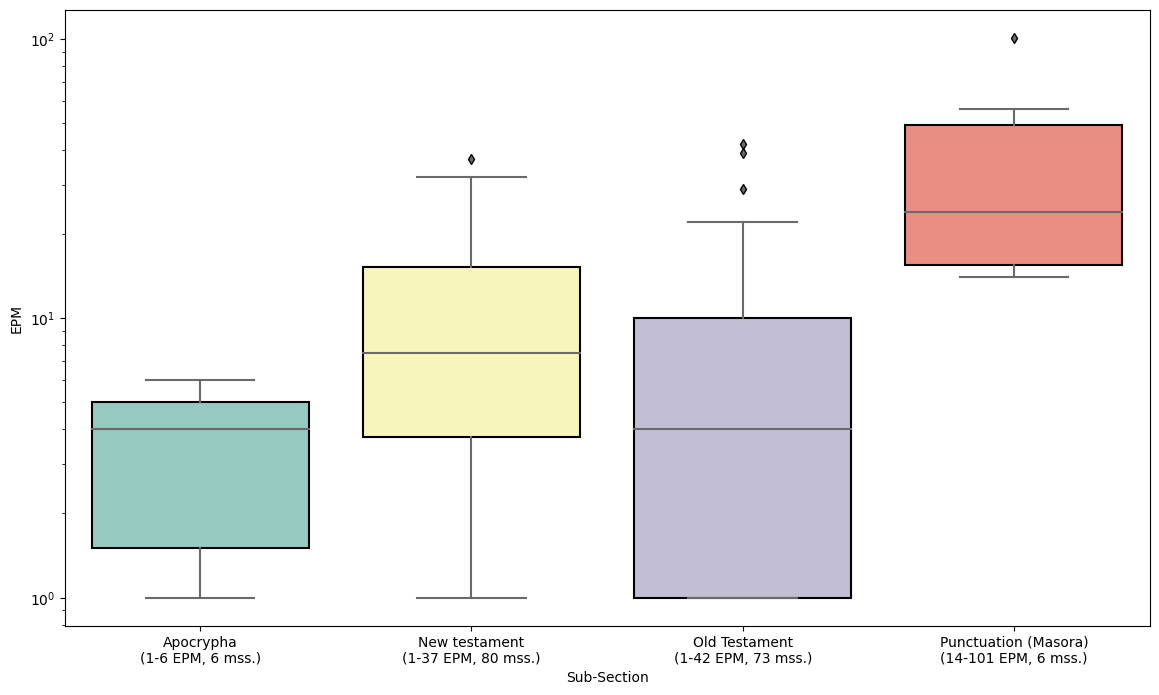

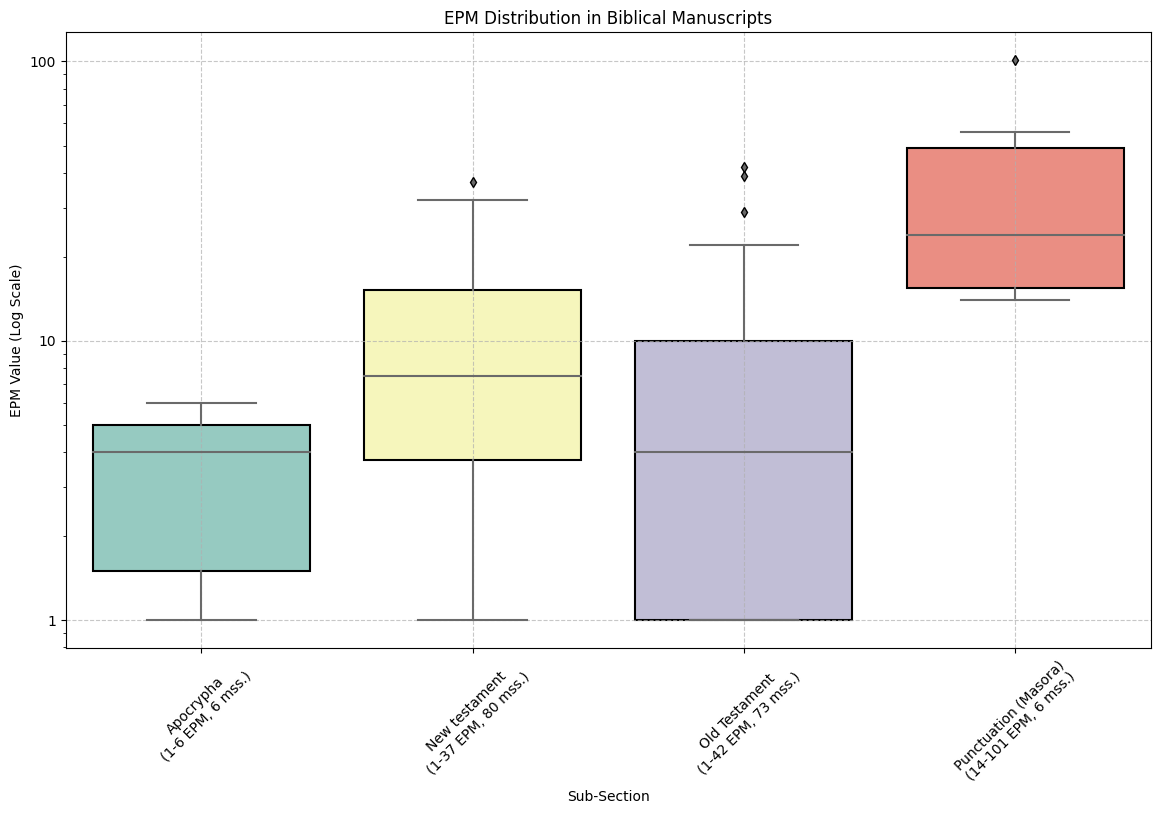

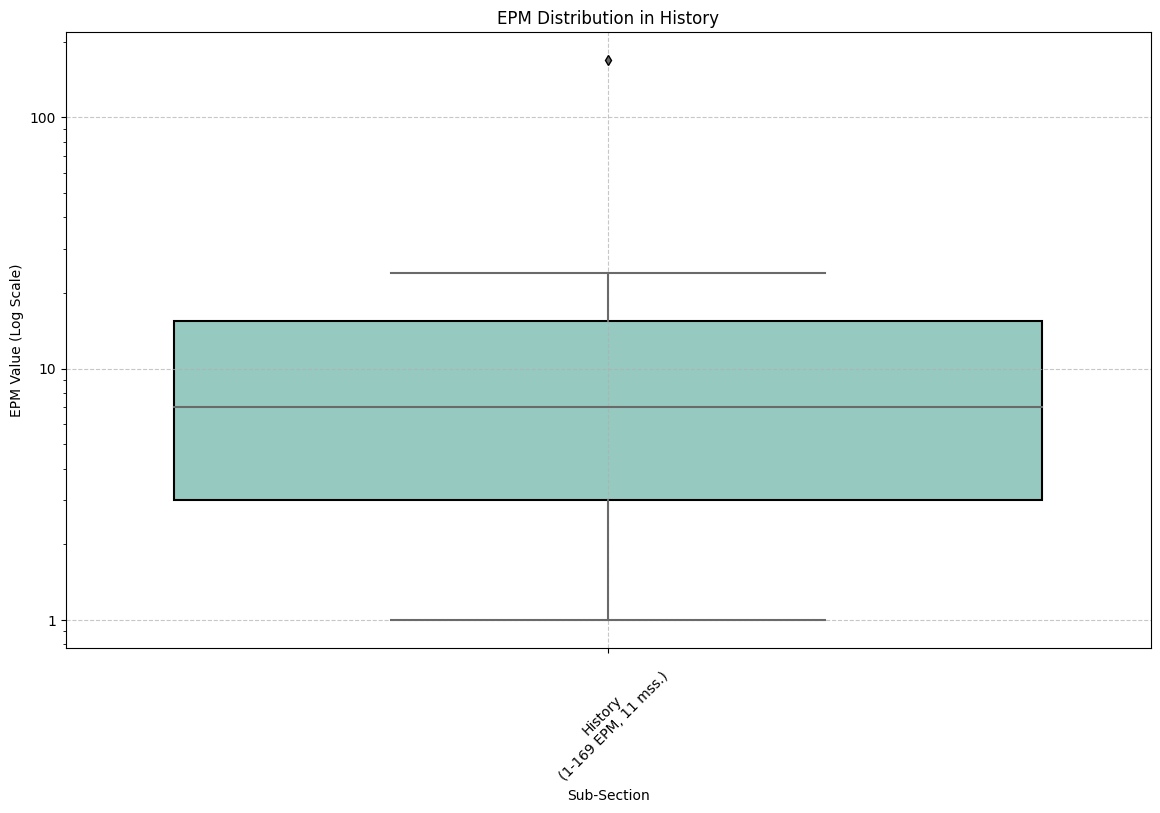

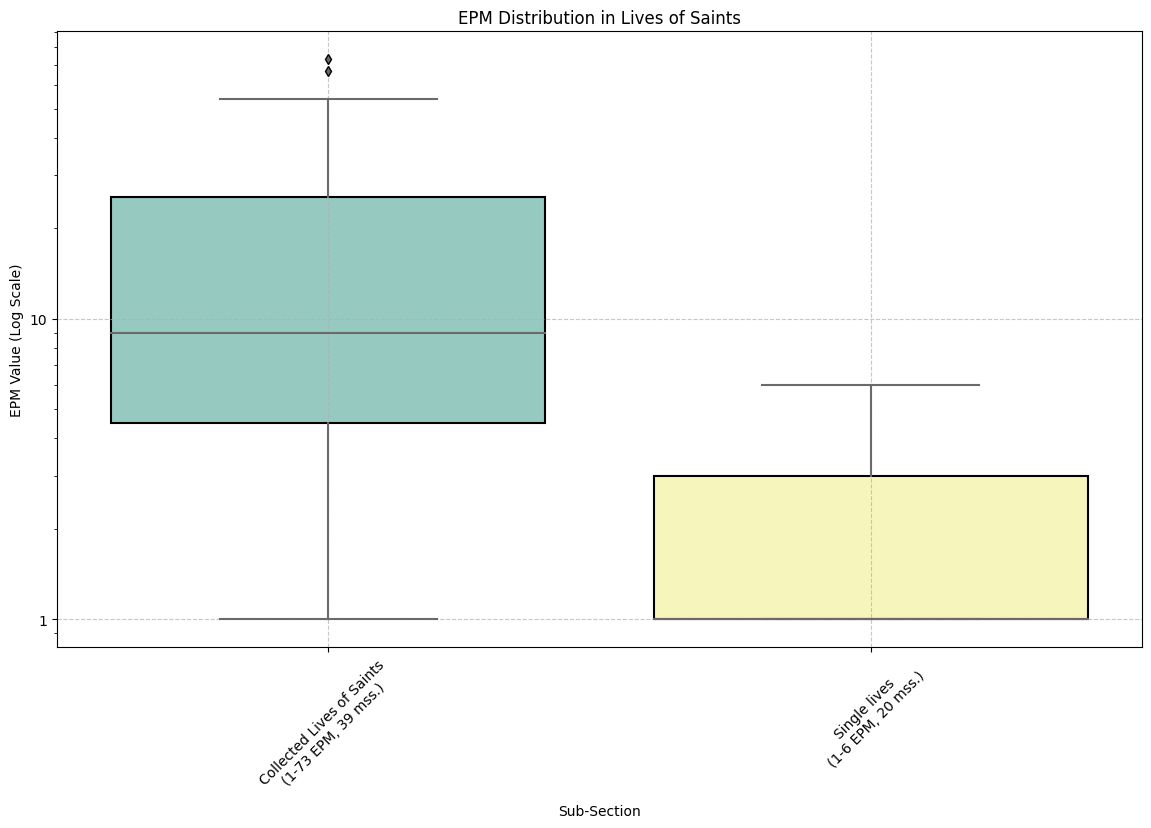

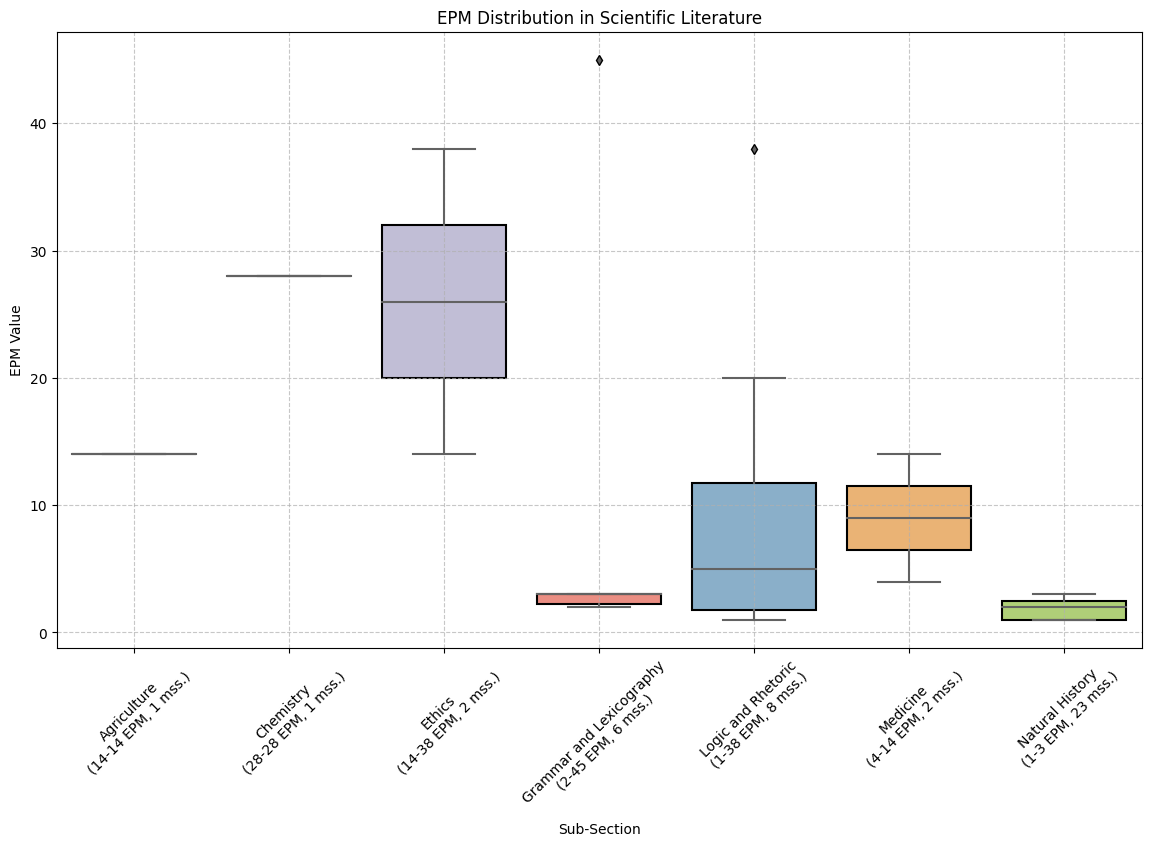

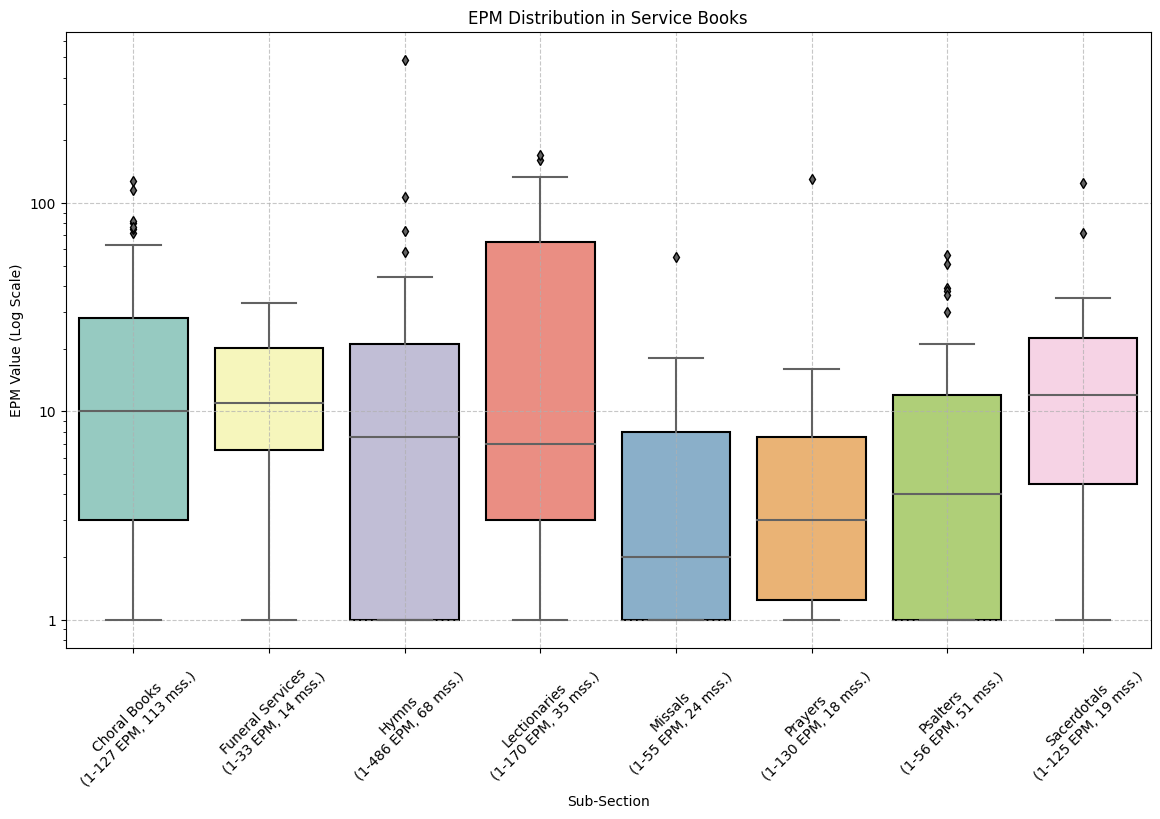

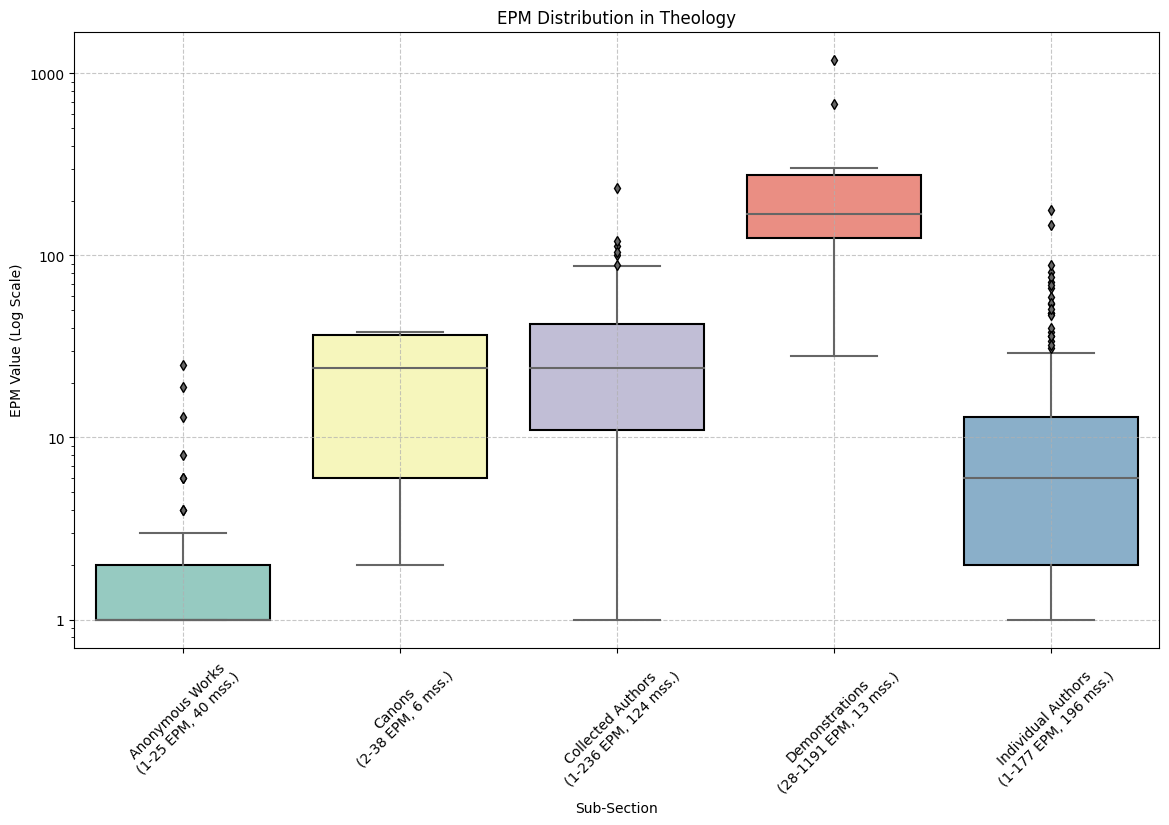

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter


# Load your dataset here
# Example: df_full = pd.read_csv('your_dataset.csv')

# Function to create box plots for each 'Wright Section' with rotated x-axis values
def create_boxplot_with_rotated_x_axis(data, section):
    plt.figure(figsize=(14, 8))
    
    # Creating a title for sub-sections with min-max EPM and total manuscripts
    subsection_epm_stats = data.groupby('Wright Sub-Section')['EPM'].agg(['min', 'max', 'count'])
    data['Sub-Section with Stats'] = data['Wright Sub-Section'].apply(
        lambda x: f"{x}\n({subsection_epm_stats.loc[x, 'min']}-{subsection_epm_stats.loc[x, 'max']} EPM, {subsection_epm_stats.loc[x, 'count']} mss.)")

    # Creating the box plot
    sns.boxplot(x='Sub-Section with Stats', y='EPM', data=data, palette="Set3", boxprops=dict(edgecolor="black"), flierprops=dict(markeredgecolor="black"))
    plt.xlabel('Sub-Section')
    
    # Check if logarithmic scale is necessary and adjust the y-axis title accordingly
    if data['EPM'].max() > 50:
        plt.yscale('log')
        plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}'.format(y)))
        # Adjusting the formatter to display y-axis values as integers
        y_axis_title = 'EPM Value (Log Scale)'
    else:
        y_axis_title = 'EPM Value'
    
    plt.ylabel(y_axis_title)
    plt.title(f'EPM Distribution in {section}')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Unique sections in the dataset
unique_sections = sum_count['Wright Section'].unique()

# Generating box plots for each section with rotated x-axis labels
for section in unique_sections:
    section_data = sum_count[sum_count['Wright Section'] == section].copy()
    create_boxplot_with_rotated_x_axis(section_data, section)


In [ ]:
#### now get diachronic analysis of the different groups of manuscripts

In [69]:
sum_count = pd.DataFrame(filter_master.groupby(['Wright Section','Wright Sub-Section','Wright simple-shelfmark','date']).count()['length'])
sum_count['grp'] = pd.cut(sum_count['length'].sort_values(),[0,20,50,100,2000], labels=['1-20','21-50','51-100','101-2,000'])
sum_count.reset_index(inplace=True)
sum_count.set_index(['grp'],inplace=True)
sum_count.sort_index(axis=1, inplace=True)
sum_count

,Wright Section,Wright Sub-Section,Wright simple-shelfmark,date,length
grp,,,,,
1-20,Biblical Manuscripts,Apocrypha,"Add.12,142,foll.1-73",7,5
1-20,Biblical Manuscripts,Apocrypha,"Add.14,446",7,5
1-20,Biblical Manuscripts,Apocrypha,"Add.14,447",10,6
1-20,Biblical Manuscripts,Apocrypha,"Add.14,484,foll.1-8",6,1
1-20,Biblical Manuscripts,Apocrypha,"Add.14,484,foll.12-47",6,3
...,...,...,...,...,...
1-20,Theology,Individual Authors,"Add.18,815",9,18
1-20,Theology,Individual Authors,"Add.18,818",7,3
51-100,Theology,Individual Authors,"Add.21,580",15,51


In [70]:
#divide into groups and create a new df based on date and group
df = sum_count.groupby(['grp','date']).describe()
df = df.droplevel(level=0,axis=1)
df.drop(columns=['std','mean','25%','75%'],inplace=True)
df

count    min    50%     max
grp       date                             
1-20      5       3.0    7.0   10.0    11.0
          6      93.0    1.0    6.0    20.0
          7      97.0    1.0    5.0    20.0
          8      50.0    1.0    4.0    18.0
          9      84.0    1.0    3.0    20.0
          10     87.0    1.0    3.0    18.0
          11     67.0    1.0    4.0    20.0
          12     49.0    1.0    3.0    20.0
          13    138.0    1.0    4.0    20.0
          14     46.0    1.0    2.5    18.0
          15     24.0    1.0    4.0    20.0
          16      4.0    1.0   11.0    16.0
          17      1.0   14.0   14.0    14.0
          18      4.0    2.0    4.5     8.0
          19      2.0    3.0   10.0    17.0
21-50     5       3.0   21.0   21.0    27.0
          6      21.0   21.0   29.0    45.0
          7      21.0   21.0   30.0    48.0
          8      14.0   22.0   29.5    48.0
          9      25.0   23.0   38.0    49.0
          10     17.0   21.0   27.0    50.0
          11     17.0   21.0   30.0    47.0
          12     11.0   21.0   28.0    42.0
          13     29.0   21.0   32.0    49.0
          14      2.0   28.0   34.5    41.0
          15      1.0   45.0   45.0    45.0
          17      1.0   28.0   28.0    28.0
          18      2.0   24.0   30.0    36.0
51-100    6       6.0   51.0   75.5    81.0
          7       6.0   51.0   62.0    85.0
          8       3.0   76.0   89.0    91.0
          9      17.0   53.0   69.0   100.0
          10      7.0   54.0   68.0    80.0
          11      5.0   64.0   70.0    82.0
          12      6.0   53.0   68.0    87.0
          13      6.0   54.0   69.5    96.0
          15      1.0   51.0   51.0    51.0
101-2,000 6       2.0  169.0  202.5   236.0
          7       3.0  104.0  104.0   486.0
          8       3.0  177.0  678.0  1191.0
          9       9.0  107.0  147.0   303.0
          10      4.0  101.0  124.5   160.0
          11      7.0  113.0  130.0   184.0
          13      1.0  121.0  121.0   121.0

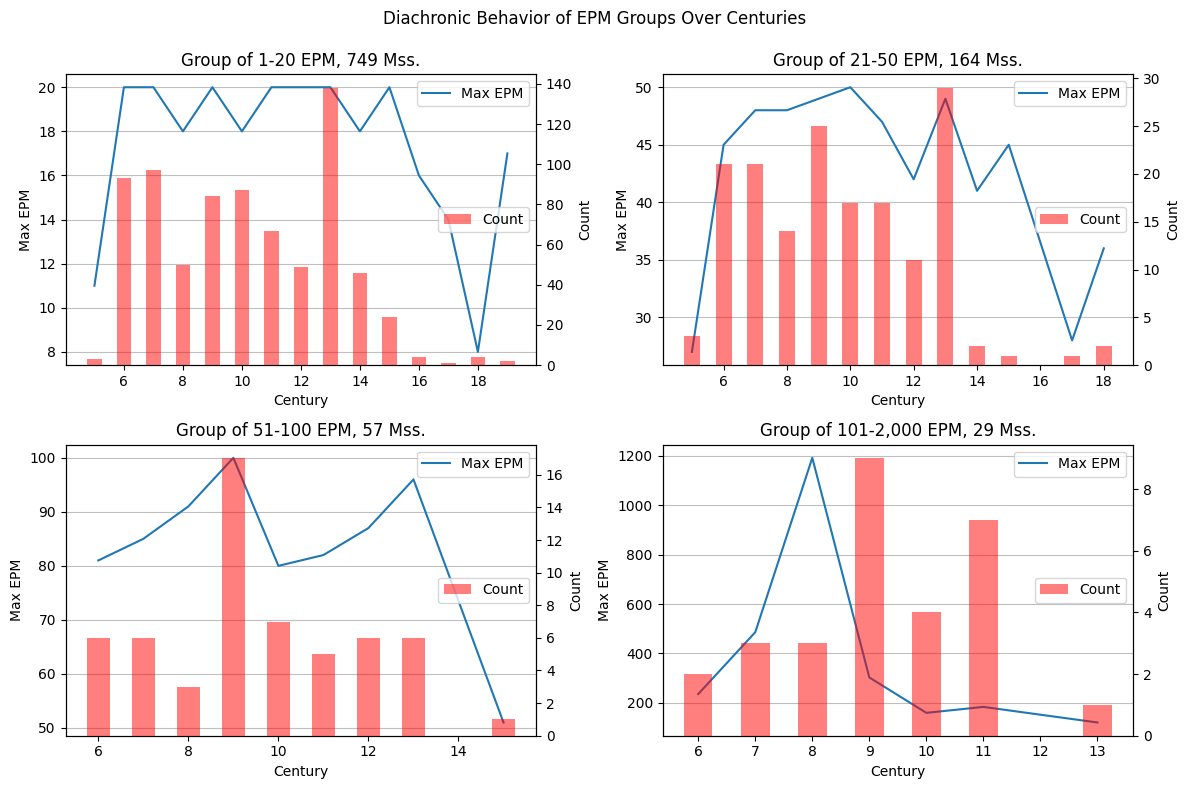

In [75]:
# Define the EPM groups
epm_groups = {
    '1-20': (1, 20),
    '21-50': (21, 50),
    '51-100': (51, 100),
    '101-1200': (101, 1200),
}

# Iterate through each EPM group
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Diachronic Behavior of EPM Groups Over Centuries')

# Iterate through each EPM group
for i, (group_name, group_data) in enumerate(df.groupby(level='grp')):
    row, col = divmod(i, 2)
    ax = axs[row, col]
    max_values = group_data['max'].tolist()
    counts = group_data['count'].tolist()
    centuries = group_data.index.get_level_values('date').unique().tolist()
    temp_count = 0
    for i in counts:
        temp_count = i+temp_count

    # Plot maximum values over centuries
    ax.plot(centuries, max_values, label='Max EPM')
    ax.set_title(f'Group of {group_name} EPM, {int(temp_count)} Mss.')
    ax.set_xlabel('Century')
    ax.set_ylabel('Max EPM')
    ax.grid(axis='y', linestyle='-', alpha=0.8)
    ax.legend(loc='best')

    # Add a second y-axis for the count of manuscripts
    ax2 = ax.twinx()
    ax2.bar(centuries, counts, color='red', label='Count', alpha=0.5, width=0.5)
    ax2.set_ylabel('Count')
    ax2.legend(loc='right')

# Adjust subplot layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

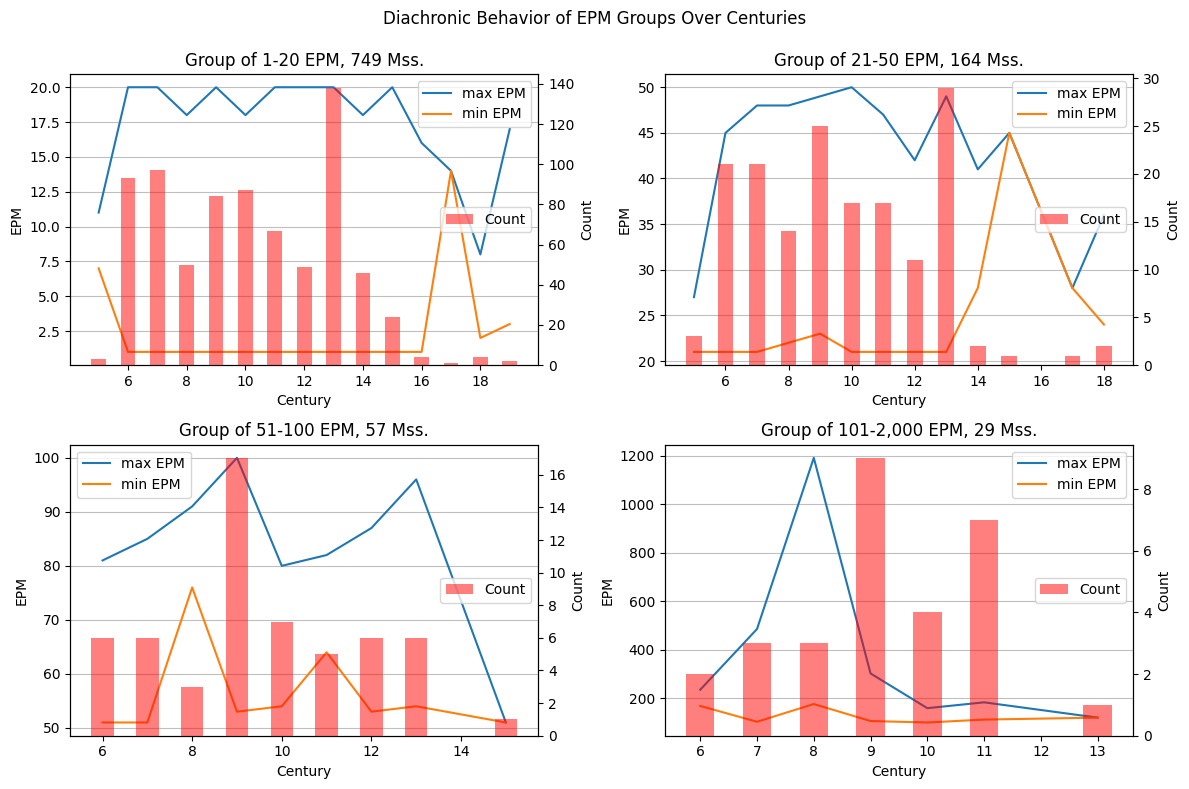

In [76]:
# trial EPM groups with min+max
epm_groups = {
    '1-20': (1, 20),
    '21-50': (21, 50),
    '51-100': (51, 100),
    '101-1200': (101, 1200),
}

# Iterate through each EPM group
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Diachronic Behavior of EPM Groups Over Centuries')

# Iterate through each EPM group
for i, (group_name, group_data) in enumerate(df.groupby(level='grp')):
    row, col = divmod(i, 2)
    ax = axs[row, col]
    max_values = group_data['max'].tolist()
    min_values = group_data['min'].tolist()    
    counts = group_data['count'].tolist()
    centuries = group_data.index.get_level_values('date').unique().tolist()
    temp_count = 0
    for i in counts:
        temp_count = i+temp_count

    # Plot maximum values over centuries
    ax.plot(centuries, max_values, label='max EPM')
    ax.plot(centuries, min_values, label='min EPM')

    ax.set_title(f'Group of {group_name} EPM, {int(temp_count)} Mss.')
    ax.set_xlabel('Century')
    ax.set_ylabel('EPM')
    ax.grid(axis='y', linestyle='-', alpha=0.8)
    ax.legend(loc='best')

    # Add a second y-axis for the count of manuscripts
    ax2 = ax.twinx()
    ax2.bar(centuries, counts, color='red', label='Count', alpha=0.5, width=0.5)
    ax2.set_ylabel('Count')
    ax2.legend(loc='right')

# Adjust subplot layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [72]:
sum_count.groupby(['grp']).count()#.plot(kind='pie',y='length')


,Wright Section,Wright Sub-Section,Wright simple-shelfmark,date,length
grp,,,,,
1-20,749,749,749,749,749
21-50,164,164,164,164,164
51-100,57,57,57,57,57
"101-2,000",29,29,29,29,29


In [17]:
# lets see which mss. are included in the top excerpted category (100+ EPM)

In [298]:
sum_count.loc['101-2,000'].sort_values(by=['length']).rename(columns={'length':'EPM'}).reset_index(drop=True)

,Wright Section,Wright Sub-Section,Wright simple-shelfmark,date,EPM
0,Biblical Manuscripts,Punctuation (Masora),"Add.12,178",10,101
1,Theology,Collected Authors,"Add.14,612",7,104
2,Theology,Catenae Patrum and Demonstrations against Here...,"Add.17,214",7,104
3,Service Books,Hymns,"Add.14,514",9,107
4,Theology,Collected Authors,"Add.12,165",11,113
5,Service Books,Choral Books,"Add.12,146",11,116
6,Theology,Collected Authors,"Add.14,535",9,120
7,Service Books,Lectionaries,"Add.18,714",13,121
8,Theology,Catenae Patrum and Demonstrations against Here...,"Add.17,191",10,124
9,Service Books,Sacerdotals,"Add.14,493",10,125


In [90]:
# fix subsections
# sum_count['Wright Sub-Section'] = sum_count['Wright Section'] +','+ sum_count['Wright Sub-Section']
# sum_count

In [151]:
#sum_count.groupby(['Wright Section','Wright Sub-Section','grp']).count().sort_index().loc['Biblical Manuscripts',slice(None),'1-5']


In [170]:
sum_count.loc[slice(None), slice(None),'Anonymous Works']

Wright simple-shelfmark  length
Wright Section grp                                   
Theology       1-5                 Add.14,537       1
               1-5      Add.14,665,foll.26,27       4
               1-5           Add.14,736,fol.3       1
               1-5      Add.14,737,foll.87-91       1
               1-5         Add.14,738,fol.116       1
               1-5         Add.14,738,fol.119       2
               1-5    Add.14,738,foll.108,109       1
               1-5    Add.14,738,foll.110-113       1
               1-5          Add.17,160,fol.27       1
               1-5          Add.17,160,fol.28       1
               1-5      Add.17,160,foll.24-26       2
               1-5      Add.17,163,foll.49-53       1
               1-5      Add.17,189,foll.17-21       1
               1-5        Add.17,213,foll.6,7       1
               1-5        Add.17,215,foll.1-4       4
               1-5      Add.17,215,foll.26,27       1
               1-5      Add.17,215,foll.30-33       2
               1-5      Add.17,215,foll.44,45       1
               1-5          Add.17,217,fol.40       1
               1-5          Add.17,217,fol.42       1
               1-5          Add.17,217,fol.44       1
               1-5          Add.17,217,fol.48       2
               1-5          Add.17,217,fol.49       1
               1-5          Add.17,217,fol.50       1
               1-5          Add.17,217,fol.51       1
               1-5          Add.17,217,fol.52       1
               1-5          Add.17,217,fol.53       1
               1-5      Add.17,217,foll.55,56       1
               1-5          Add.17,218,fol.58       1
               1-5          Add.17,218,fol.84       1
               1-5          Add.17,218,fol.89       2
               1-5      Add.17,218,foll.85,86       3
               1-5      Add.17,218,foll.87,88       1
               1-5      Add.17,272,foll.68-74       1
               6-10       Add.14,628,foll.1-8       6
               6-10     Add.14,636,foll.77-82       6
               6-10     Add.14,736,foll.22-32       8
               11-20     Add.14,722,foll.1-61      19
               11-20               Add.17,127      13
               21-50    Add.14,636,foll.57-76      25

In [171]:
#need to figure out how to present the range
# td = sum_count.reset_index()
# for group in td.grp.unique():
#     temp = td[td['grp']==group]
#     print(group)
#     print(temp['Wright Sub-Section'].value_counts().sort_index())

In [ ]:
# Excerpting is shared across genres, with two specific genres (biblical + catenae) having a limited range. 
#Especially in regard to the highest group, not only collections are there – liturgy, history, individual theology 
# and biblical punctuation (Masora). In other words, high excerpting is not only a feature of collections.
#####
# now let's use a diachronic perspective

In [177]:
sum_count = pd.DataFrame(filter_master.groupby(['date','Wright simple-shelfmark']).count()['length'])#,'date']
sum_count['grp'] = pd.cut(filter_master.groupby(['date','Wright simple-shelfmark']).count()['length'].sort_values(),[0,5,10,20,50,100,2000], labels=['1-5','6-10','11-20','21-50','51-100','101-2,000'])
sum_count.reset_index(inplace=True)
sum_count.set_index(['grp','date'],inplace=True)
sum_count.sort_index(inplace=True)
sum_count

Wright simple-shelfmark  length
grp       date                                 
1-5       6      Add.12,142,foll.74-107       5
          6     Add.12,166,foll.155-258       4
          6                  Add.14,427       4
          6        Add.14,438,foll.1-49       3
          6        Add.14,443,foll.1-34       3
...                                 ...     ...
101-2,000 11                 Add.14,488     160
          11                 Add.14,503     127
          11                 Add.14,517     130
          11                 Add.17,923     170
          13                 Add.18,714     121

[999 rows x 2 columns]

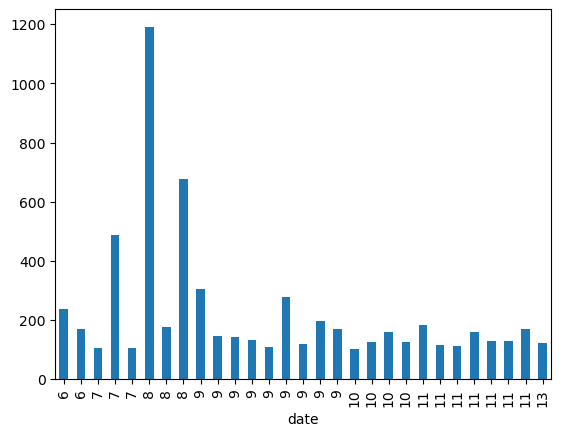

In [205]:
sum_count.loc['101-2,000'].length.plot.bar()
plt.show()

In [ ]:
# now add genre to date

In [210]:
sum_count = pd.DataFrame(filter_master.groupby(['Wright Section','Wright Sub-Section','date','Wright simple-shelfmark']).count()['length'])#,'date']
sum_count['grp'] = pd.cut(filter_master.groupby(['Wright Section','Wright Sub-Section','date','Wright simple-shelfmark']).count()['length'].sort_values(),[0,50,100,2000], labels=['1-50','51-100','101-2,000'])
sum_count.reset_index(inplace=True)
sum_count.set_index(['Wright Section','Wright Sub-Section','grp','date'],inplace=True)
sum_count.sort_index(inplace=True)
sum_count

Wright simple-shelfmark  \
Wright Section       Wright Sub-Section grp       date                           
Biblical Manuscripts Apocrypha          1-50      6        Add.14,484,foll.1-8   
                                                  6      Add.14,484,foll.12-47   
                                                  7       Add.12,142,foll.1-73   
                                                  7                 Add.14,446   
                                                  10                Add.14,447   
...                                                                        ...   
Theology             Individual Authors 51-100    9                 Add.14,549   
                                                  9                 Add.17,147   
                                                  15                Add.21,580   
                                        101-2,000 8                 Add.12,157   
                                                  9                 Add.12,159   

                                                        length  
Wright Section       Wright Sub-Section grp       date          
Biblical Manuscripts Apocrypha          1-50      6          1  
                                                  6          3  
                                                  7          5  
                                                  7          5  
                                                  10         6  
...                                                        ...  
Theology             Individual Authors 51-100    9         66  
                                                  9         69  
                                                  15        51  
                                        101-2,000 8        177  
                                                  9        147  

[999 rows x 2 columns]

In [221]:
sum_count.loc[slice(None),'Collected Authors',slice(None)]#.length.plot.bar()plt.show()

Wright simple-shelfmark  length
Wright Section grp       date                                 
Theology       1-50      5                  Add.12,150      27
                         6       Add.12,166,foll.1-154      35
                         6     Add.12,169,foll.179-218      15
                         6       Add.12,175,foll.49-80      15
                         6                  Add.14,581      22
...                                                ...     ...
               51-100    13                 Add.21,210      73
               101-2,000 6                  Add.12,156     236
                         7                  Add.14,612     104
                         9                  Add.14,535     120
                         11                 Add.12,165     113

[124 rows x 2 columns]

In [206]:

sum_count = pd.DataFrame(filter_master.groupby(['Wright Sub-Section','Wright simple-shelfmark','date']).count()['length'])#,'date']
sum_count['grp'] = pd.cut(filter_master.groupby(['Wright Sub-Section','Wright simple-shelfmark','date']).count()['length'].sort_values(),[0,5,10,20,50,100,2000], labels=['1-5','6-10','11-20','21-50','51-100','101-2,000'])
sum_count

length    grp
Wright Sub-Section Wright simple-shelfmark date               
Agriculture        Add.14,662              9         14  11-20
Anonymous Works    Add.14,537              8          1    1-5
                   Add.14,628,foll.1-8     11         6   6-10
                   Add.14,636,foll.57-76   10        25  21-50
                   Add.14,636,foll.77-82   10         6   6-10
...                                                 ...    ...
Single lives       Add.17,203              11         1    1-5
                   Add.17,213,fol.19       11         1    1-5
                   Add.17,216,fol.44       9          1    1-5
                   Add.17,216,fol.45       10         1    1-5
                   Add.17,272,foll.64-67   12         3    1-5

[999 rows x 2 columns]

In [193]:
# td = sum_count.reset_index()
# for group in td.grp.sort_values().unique():
#     temp = td[td['grp']==group]
#     print(group)
#     for date in temp.date.sort_values().unique():
#         print(date)
#         temp_2 = temp[temp['date']==date]
#         print(temp_2['Wright Sub-Section'].value_counts().sort_index())
        

In [224]:
cen_list=filter_master['date'].unique()
cen_list.sort()
temp_filter = filter_master.copy()
#temp_filter = filter_master[filter_master['Wright Sub-Section']=='Hymns']

for section in temp_filter['Wright Section'].unique():
    lss = []
    for cen in cen_list:
        temp_df = temp_filter[temp_filter['Wright Section']==section]
        temp_df = temp_df[temp_df['date']==cen]
        ls = temp_df.groupby(['Wright simple-shelfmark']).count()['length'].describe(percentiles=[0.75,0.92,0.98]).drop(index=['count','mean','std']).rename(f'{cen}')
        lss.append(ls)
    fig = px.line(lss, title=f'{section} descriptives over all centuries',labels={'index':'centuries', 'value':'extracts','variable':'stats'})
    fig.show()


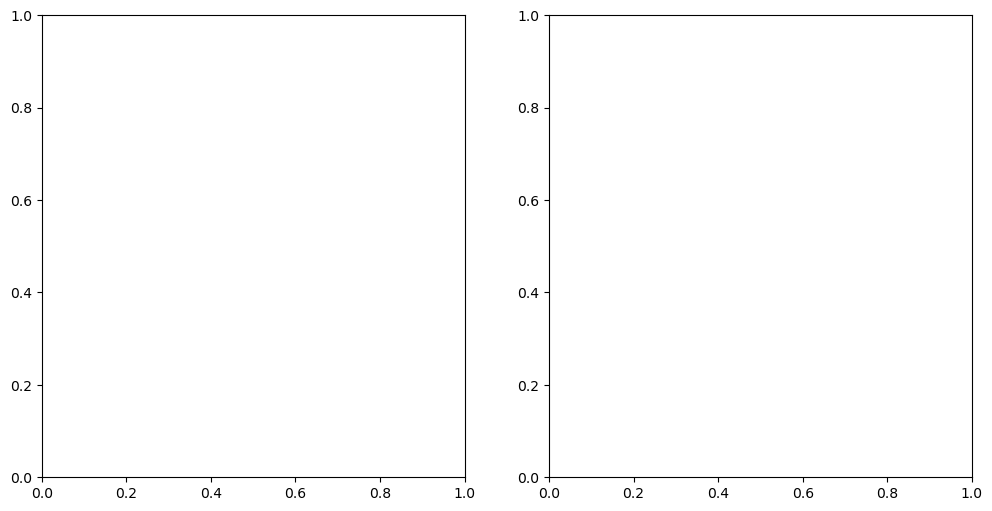

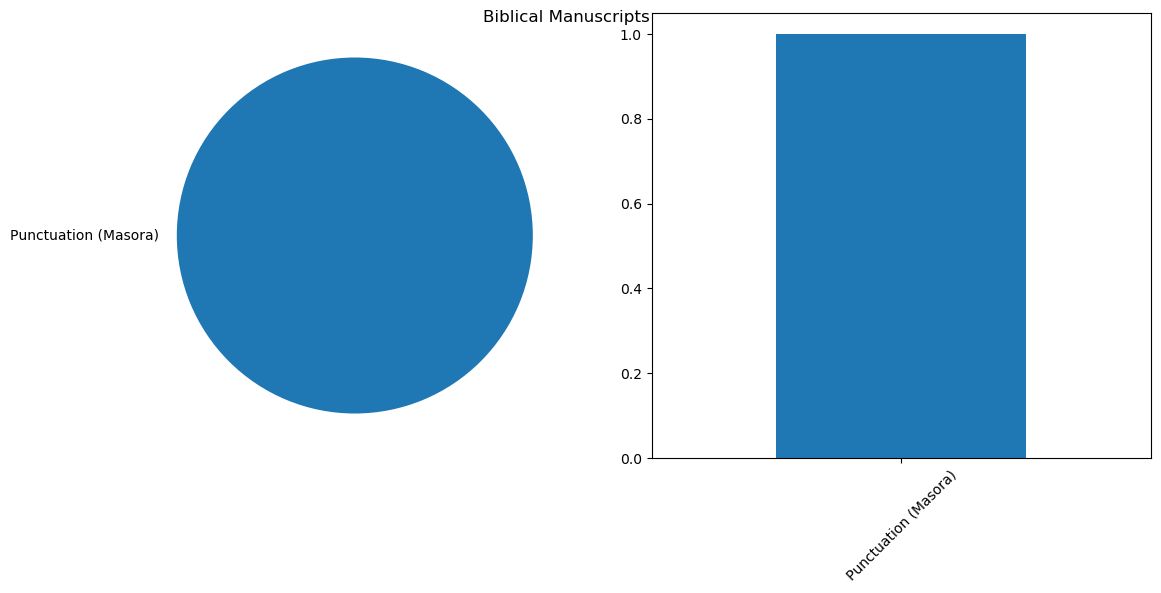

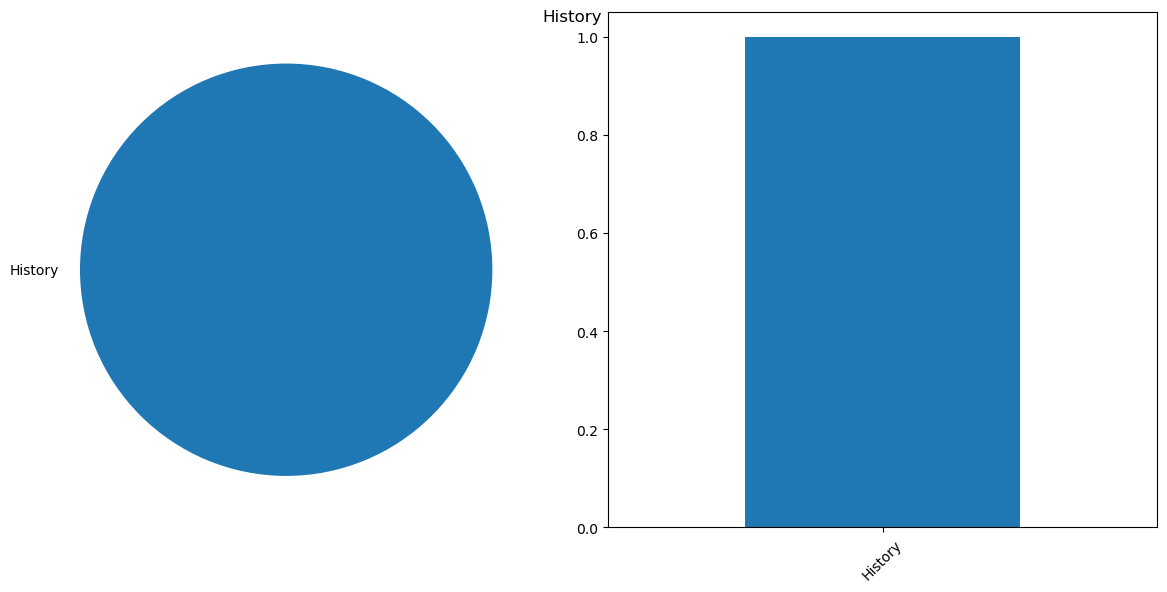

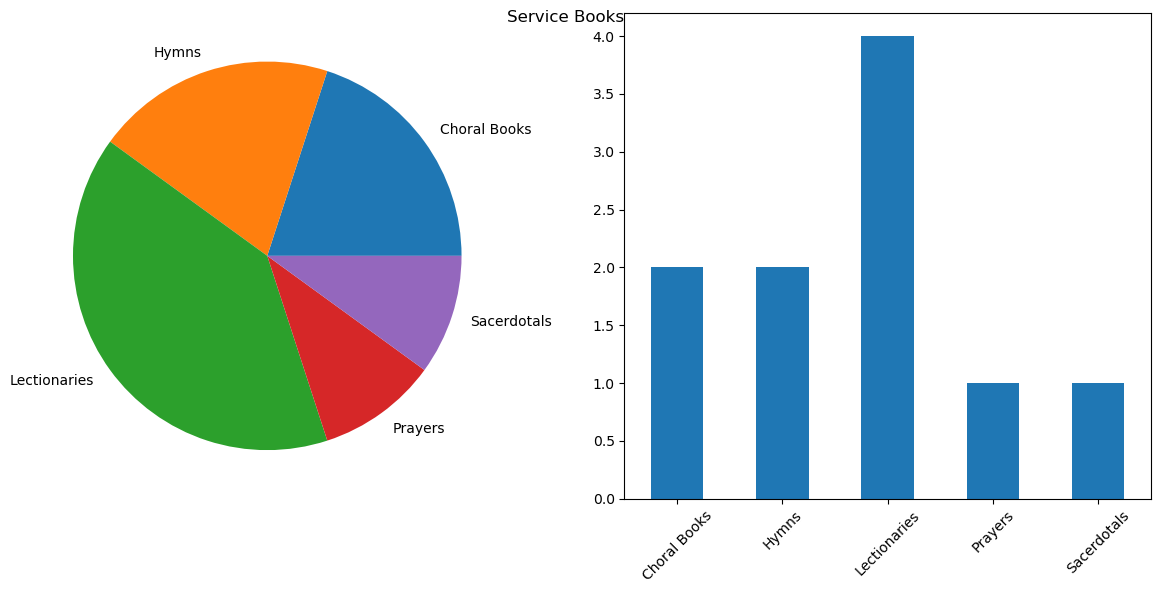

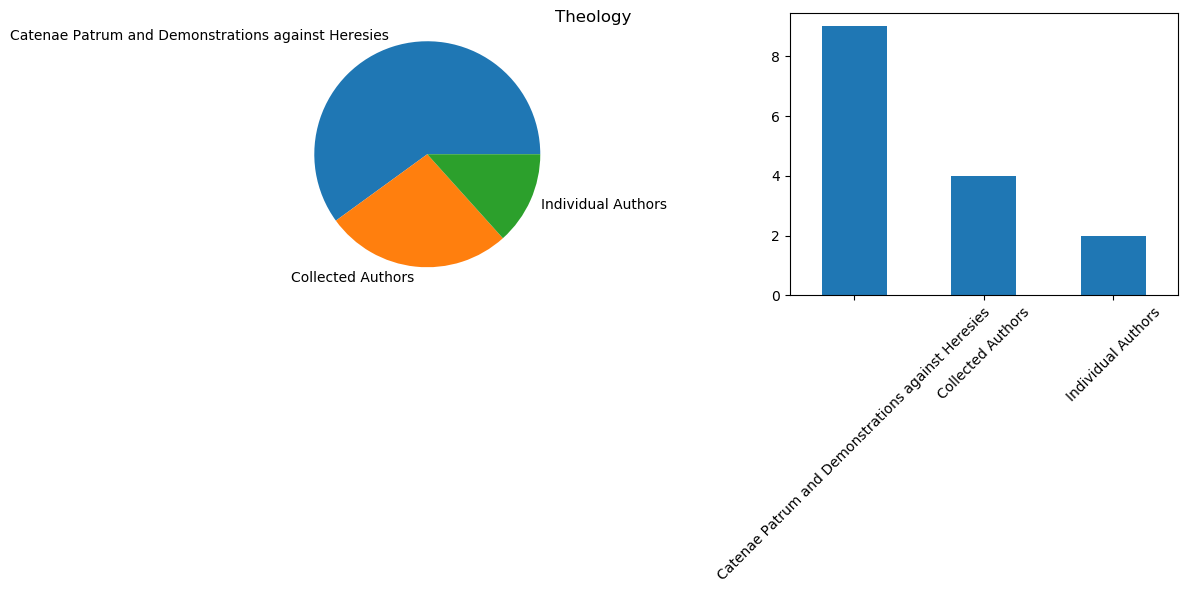

In [53]:
for cat1, subdf in td.groupby(level='Wright Section'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    subdf.loc[cat1, :].plot.pie(y='grp', ax=ax1, ylabel='', legend=False)
    subdf.loc[cat1, :].plot.bar(y='length', ax=ax2, rot=45, xlabel='', legend=False)
    fig.suptitle(cat1)
    fig.tight_layout()
    plt.show()